In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
import warnings
from collections import Counter
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [2]:
zip_file_path = 'Netherlands_data_prototype.zip'
csv_file_inside_zip = 'Netherlands_data_prototype.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df

,HHPers,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,HHEFiets,Jaar,Maand,Weekdag,Feestdag,Toer,KMotiefV,AfstR,RReisduur,RVertUur,KRvm
0,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,15,5
3,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,18,5
4,2,1,42,1,3,1,1,0,0,2018,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,7,63,15,18,1


In [6]:
print(df.columns)

Index(['HHPers', 'Geslacht', 'Leeftijd', 'Herkomst', 'Opleiding',
       'OPRijbewijsAu', 'HHAuto', 'HMopeds', 'HHEFiets', 'Jaar', 'Maand',
       'Weekdag', 'Feestdag', 'Toer', 'KMotiefV', 'AfstR', 'RReisduur',
       'RVertUur', 'KRvm'],
      dtype='object')


In [7]:
new_columns= {"HHPers": "People_in_house", "Geslacht": "Gender", "Leeftijd": "Age",
              "Herkomst": "Background", "Opleiding": "Education", "OPRijbewijsAu": "Driver_license", "HHAuto": "Cars_in_house",
              "HMopeds": "Mopeds_in_house", "HHEFiets": "Electric_bike", "Jaar": "Year", "Maand": "Month", "Weekdag": "Weekday",
               "Feestdag": "Holiday","Toer": "Round_trip", "KMotiefV": "Motive",
              "AfstR": "Distance", "RReisduur": "Duration", 'RVertUur':'Hour', "KRvm": "Mode"}

In [8]:
df.rename(columns=new_columns, inplace=True)
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,15,5
3,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,18,5
4,2,1,42,1,3,1,1,0,0,2018,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,7,63,15,18,1


In [9]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Year', 'Month', 'Weekday', 'Holiday', 'Round_trip', 'Motive',
       'Distance', 'Duration', 'Hour', 'Mode'],
      dtype='object')

In [10]:
df.isnull().any()

People_in_house    False
Gender             False
Age                False
Background         False
Education          False
Driver_license     False
Cars_in_house      False
Mopeds_in_house    False
Electric_bike      False
Year               False
Month              False
Weekday            False
Holiday            False
Round_trip         False
Motive             False
Distance           False
Duration           False
Hour               False
Mode               False
dtype: bool

In [11]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Year', 'Month', 'Weekday', 'Holiday', 'Round_trip', 'Motive',
       'Distance', 'Duration', 'Hour', 'Mode'],
      dtype='object')

In [12]:
drops = ['Year']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,15,5
3,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,18,5
4,2,1,42,1,3,1,1,0,0,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,12,5,0,0,7,63,15,18,1


In [13]:
df.duplicated().sum()

37213

In [14]:
df = df.drop_duplicates()
df.shape

(779913, 18)

In [15]:
df = df.drop_duplicates(subset=df.columns.difference(['Mode']))
df.shape

(779309, 18)

In [16]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,15,5
3,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,18,5
4,2,1,42,1,3,1,1,0,0,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,12,5,0,0,7,63,15,18,1


In [17]:
df['Gender'].value_counts()

Gender
2    403173
1    376136
Name: count, dtype: int64

In [18]:
df['Gender'] = df['Gender'].map({1:"Male", 2:"Female"})

In [19]:
df['Driver_license'].value_counts()

Driver_license
1    582422
0    196887
Name: count, dtype: int64

In [20]:
df['Driver_license'] = df['Driver_license'].map({0:"No", 1:"Yes"})

In [21]:
df['Background'] = df['Background'].map({1:"Dutch", 2:"Non Dutch", 3:"Non Dutch"})

In [22]:
df['Background'].value_counts()

Background
Dutch        621044
Non Dutch    158265
Name: count, dtype: int64

In [23]:
df['Education'] = df['Education'].map({0:"No education", 1:"Primary education", 2:"Lower vocational", 3:"Secondary", 4:"Higher education",
                                       5:"Other education", 7:"Currently attending"})

In [24]:
df['Education'].value_counts()

Education
Higher education       323370
Secondary              224730
Lower vocational        98185
Currently attending     85745
Primary education       24492
Other education         15903
No education             6884
Name: count, dtype: int64

In [25]:
df['Holiday'] = df['Holiday'].map({0: "No", 1: "Yes"})

In [26]:
df['Holiday'].value_counts()

Holiday
No     766610
Yes     12699
Name: count, dtype: int64

In [27]:
df['Electric_bike'] = df['Electric_bike'].map({0:"No", 1:"Yes"})

In [28]:
df['Electric_bike'].value_counts()

Electric_bike
No     550606
Yes    228703
Name: count, dtype: int64

In [29]:
df['Month'].value_counts()

Month
9     72759
11    70508
1     69677
10    69494
5     65462
3     65439
6     64584
8     62874
7     60760
12    60625
2     59214
4     57913
Name: count, dtype: int64

In [30]:
df['Month'] = df['Month'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                               8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [31]:
df['Weekday'].value_counts()

Weekday
6    123426
5    117659
3    115120
4    114793
2    112246
7    111703
1     84362
Name: count, dtype: int64

In [32]:
df['Weekday'] = df['Weekday'].map({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"})

In [33]:
df['Round_trip'].value_counts()

Round_trip
0    680994
1     98315
Name: count, dtype: int64

In [34]:
df['Round_trip'] = df['Round_trip'].map({0:"No", 1:"Yes"})

In [35]:
df['Motive'].value_counts()

Motive
4    150677
7    141223
1    135259
9     82698
8     80981
6     79849
5     63903
3     25351
2     19368
Name: count, dtype: int64

In [36]:
df['Motive'] = df['Motive'].map({1:"Go to/return from work", 2:"Business related", 3:"Service/Personal care", 4:"Shopping/Grocery",
                                 5:"Education", 6:"Visits", 7:"Social and recreational", 8:"Tours/hiking", 9:"Other motives" })

In [37]:
df['Mode'].value_counts()

Mode
1    256839
5    223936
6    188503
2     81561
4     28470
Name: count, dtype: int64

1 represents car driver and 2 represents car passenger. We will group them into one class : car

In [38]:
df['Mode'] = df['Mode'].map({1:"car", 2:"car", 4:"public transport", 5:"bike", 6:"walk"})

In [39]:
df['Mode'].value_counts()

Mode
car                 338400
bike                223936
walk                188503
public transport     28470
Name: count, dtype: int64

In [40]:
df.shape

(779309, 18)

In [41]:
df.shape

(779309, 18)

In [42]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,60,15,10,car
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,60,10,11,car
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,10,5,15,bike
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,10,5,18,bike
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,30,10,9,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Education,110,35,15,car
817122,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,11,7,16,walk
817123,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,6,5,17,walk
817124,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,63,15,18,car


In [43]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Distance,Duration,Hour
count,779309.000000,779309.000000,779309.000000,779309.000000,779309.000000,779309.000000,779309.000000
mean,2.853300,42.293691,1.380415,0.207407,97.432447,24.076450,13.629871
std,1.387651,20.753990,1.001660,0.592609,199.654405,31.751656,4.254536
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,11.000000,10.000000,10.000000
50%,3.000000,42.000000,1.000000,0.000000,30.000000,15.000000,14.000000
75%,4.000000,59.000000,2.000000,0.000000,86.000000,30.000000,17.000000
max,10.000000,99.000000,10.000000,19.000000,6600.000000,993.000000,33.000000


The distance column stores values that are measured in Hectometers. We need to convert those to Kilometers as they are more 
widely used and easier to understand. To convert Hectometers into Kms we need to devide the values with 10

In [44]:
df['Distance_in_kms'] = df['Distance'] / 10

We drop now the Distance column

In [45]:
df = df.drop("Distance", axis=1)

In [46]:
df = df[(df['Hour'] <= 23)]

In [47]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,778960.000000,778960.000000,778960.000000,778960.000000,778960.000000,778960.000000,778960.000000
mean,2.853523,42.298861,1.380578,0.207438,24.080339,13.625118,9.745598
std,1.387611,20.755240,1.001369,0.592659,31.757284,4.249525,19.968944
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,0.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,19.000000,993.000000,23.000000,660.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778960 entries, 0 to 817125
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   People_in_house  778960 non-null  int64  
 1   Gender           778960 non-null  object 
 2   Age              778960 non-null  int64  
 3   Background       778960 non-null  object 
 4   Education        778960 non-null  object 
 5   Driver_license   778960 non-null  object 
 6   Cars_in_house    778960 non-null  int64  
 7   Mopeds_in_house  778960 non-null  int64  
 8   Electric_bike    778960 non-null  object 
 9   Month            778960 non-null  object 
 10  Weekday          778960 non-null  object 
 11  Holiday          778960 non-null  object 
 12  Round_trip       778960 non-null  object 
 13  Motive           778960 non-null  object 
 14  Duration         778960 non-null  int64  
 15  Hour             778960 non-null  int64  
 16  Mode             778960 non-null  object 
 

We will also remove samples where Distance and Duration are 0

In [49]:
df = df[(df['Distance_in_kms'] > 0)]

In [50]:
df = df[(df['Duration'] > 0)]

In [51]:
df.shape

(778741, 18)

In [52]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,778741.000000,778741.000000,778741.000000,778741.000000,778741.000000,778741.000000,778741.000000
mean,2.853638,42.299685,1.380596,0.207455,24.087111,13.625384,9.748339
std,1.387636,20.756257,1.001250,0.592694,31.759181,4.249481,19.971083
min,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,25.000000,1.000000,0.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,0.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,19.000000,993.000000,23.000000,660.000000


In [53]:
df = df[(df['Age'] >= 18)]
df.shape

(665679, 18)

In [54]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,665679.000000,665679.000000,665679.000000,665679.000000,665679.000000,665679.000000,665679.000000
mean,2.619838,47.520718,1.348975,0.205548,24.710153,13.631507,10.470594
std,1.293777,17.729566,0.986803,0.592456,32.248721,4.297738,20.799149
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,19.000000,960.000000,23.000000,660.000000


In [55]:
df = df[(df['Duration'] <= 300)]

In [56]:
df = df[(df['Distance_in_kms'] <= 200)]

In [57]:
df = df[(df['Mopeds_in_house'] <= 6)]

In [58]:
df.shape

(663745, 18)

In [59]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000
mean,2.620011,47.508646,1.347947,0.199550,24.033537,13.636659,10.226983
std,1.293940,17.730048,0.984690,0.543227,28.103641,4.297903,19.631087
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,6.000000,300.000000,23.000000,200.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663745 entries, 0 to 817125
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   People_in_house  663745 non-null  int64  
 1   Gender           663745 non-null  object 
 2   Age              663745 non-null  int64  
 3   Background       663745 non-null  object 
 4   Education        663745 non-null  object 
 5   Driver_license   663745 non-null  object 
 6   Cars_in_house    663745 non-null  int64  
 7   Mopeds_in_house  663745 non-null  int64  
 8   Electric_bike    663745 non-null  object 
 9   Month            663745 non-null  object 
 10  Weekday          663745 non-null  object 
 11  Holiday          663745 non-null  object 
 12  Round_trip       663745 non-null  object 
 13  Motive           663745 non-null  object 
 14  Duration         663745 non-null  int64  
 15  Hour             663745 non-null  int64  
 16  Mode             663745 non-null  object 
 

In [61]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000
mean,2.620011,47.508646,1.347947,0.199550,24.033537,13.636659,10.226983
std,1.293940,17.730048,0.984690,0.543227,28.103641,4.297903,19.631087
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,6.000000,300.000000,23.000000,200.000000


In [62]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.513812
Secondary            32.915352
Lower vocational     13.775170
Other education       2.340507
Primary education     1.792255
No education          0.662905
Name: proportion, dtype: float64


In [63]:
value_mapping = {
                 "Other education":"Other",
                 "Primary education":"Other",
                 "No education":"Other"
                }
df['Education'] = df['Education'].replace(value_mapping)

In [64]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education    48.513812
Secondary           32.915352
Lower vocational    13.775170
Other                4.795667
Name: proportion, dtype: float64


In [65]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.314963
Go to/return from work     19.751561
Social and recreational    16.179105
Other motives              11.590445
Tours/hiking               11.369728
Visits                     10.200755
Service/Personal care       3.547145
Education                   3.196710
Business related            2.849588
Name: proportion, dtype: float64


In [66]:
value_mapping = {
                 "Service/Personal care":"Service/Education/Business",
                 "Education":"Service/Education/Business",
                 "Business related":"Service/Education/Business",
                }
df['Motive'] = df['Motive'].replace(value_mapping)

In [67]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery              21.314963
Go to/return from work        19.751561
Social and recreational       16.179105
Other motives                 11.590445
Tours/hiking                  11.369728
Visits                        10.200755
Service/Education/Business     9.593443
Name: proportion, dtype: float64


In [68]:
perc=df['Hour'].value_counts(True)*100
print(perc)

Hour
17    8.750348
16    8.311626
14    7.617685
8     7.372259
15    7.364575
13    7.152446
11    7.090524
12    6.977077
10    6.942124
9     5.961476
18    5.717407
19    4.747908
7     4.425193
20    3.246578
21    2.347739
22    2.035119
6     1.603477
23    1.404455
5     0.406783
1     0.142223
2     0.105312
4     0.103052
0     0.100038
3     0.074577
Name: proportion, dtype: float64


In [69]:
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df.drop(columns=['Hour'], inplace=True)

In [70]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Duration,Mode,Distance_in_kms,Hour_sin,Hour_cos
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,15,car,6.0,0.500000,-8.660254e-01
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,10,car,6.0,0.258819,-9.659258e-01
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,bike,1.0,-0.707107,-7.071068e-01
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,bike,1.0,-1.000000,-1.836970e-16
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,10,car,3.0,0.707107,-7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Service/Education/Business,35,car,11.0,-0.707107,-7.071068e-01
817122,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,7,walk,1.1,-0.866025,-5.000000e-01
817123,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,5,walk,0.6,-0.965926,-2.588190e-01
817124,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,15,car,6.3,-1.000000,-1.836970e-16


In [71]:
df.duplicated().sum()

6

In [72]:
df = df.drop_duplicates()
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Duration,Mode,Distance_in_kms,Hour_sin,Hour_cos
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,15,car,6.0,0.500000,-8.660254e-01
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,10,car,6.0,0.258819,-9.659258e-01
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,bike,1.0,-0.707107,-7.071068e-01
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,bike,1.0,-1.000000,-1.836970e-16
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,10,car,3.0,0.707107,-7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Service/Education/Business,35,car,11.0,-0.707107,-7.071068e-01
817122,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,7,walk,1.1,-0.866025,-5.000000e-01
817123,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,5,walk,0.6,-0.965926,-2.588190e-01
817124,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,15,car,6.3,-1.000000,-1.836970e-16


In [73]:
one_hot_encoded = pd.get_dummies(df[['Motive']])

one_hot_encoded = one_hot_encoded.astype(int)

df = pd.concat([df, one_hot_encoded], axis=1)

In [74]:
le=LabelEncoder()
features=["Gender","Electric_bike", "Driver_license", "Round_trip", "Holiday", "Background"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [75]:
value_mapping = {"car":0, "bike":1, "walk":2, "public transport":3}
df['Mode'] = df['Mode'].replace(value_mapping)

In [76]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['Weekday'] = df['Weekday'].replace(value_mapping)

In [77]:
df['Weekday_sin'] = np.sin(2 * np.pi * df['Weekday'] / 7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Weekday'] / 7)
df.drop(columns=['Weekday'], inplace=True)

In [78]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Month'] = df['Month'].replace(value_mapping)

In [79]:
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df.drop(columns=['Month'], inplace=True)

In [80]:
value_mapping = {"Other":1, "Secondary":2, "Lower vocational":3, "Higher education":4}
df['Education'] = df['Education'].replace(value_mapping)

In [81]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Holiday,...,Motive_Other motives,Motive_Service/Education/Business,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Weekday_sin,Weekday_cos,Month_sin,Month_cos
0,1,1,42,0,2,1,1,0,0,0,...,0,0,1,0,0,0,-0.781831,0.623490,5.000000e-01,0.866025
1,1,1,42,0,2,1,1,0,0,0,...,0,0,1,0,0,0,-0.781831,0.623490,5.000000e-01,0.866025
2,1,1,42,0,2,1,1,0,0,0,...,0,0,0,0,0,1,-0.781831,0.623490,5.000000e-01,0.866025
3,1,1,42,0,2,1,1,0,0,0,...,0,0,0,0,0,1,-0.781831,0.623490,5.000000e-01,0.866025
4,2,1,42,0,2,1,1,0,0,0,...,0,0,1,0,0,0,-0.974928,-0.222521,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,1,4,1,1,0,0,0,...,0,1,0,0,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000
817122,3,0,49,1,4,1,1,0,0,0,...,0,0,1,0,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000
817123,3,0,49,1,4,1,1,0,0,0,...,0,0,1,0,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000
817124,3,0,49,1,4,1,1,0,0,0,...,0,0,0,1,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000


In [82]:
df.duplicated().sum()

0

In [83]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Round_trip', 'Motive', 'Duration', 'Mode',
       'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Motive_Visits', 'Weekday_sin', 'Weekday_cos', 'Month_sin',
       'Month_cos'],
      dtype='object')

In [84]:
drops = ['Motive']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Holiday,...,Motive_Other motives,Motive_Service/Education/Business,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Weekday_sin,Weekday_cos,Month_sin,Month_cos
0,1,1,42,0,2,1,1,0,0,0,...,0,0,1,0,0,0,-0.781831,0.623490,5.000000e-01,0.866025
1,1,1,42,0,2,1,1,0,0,0,...,0,0,1,0,0,0,-0.781831,0.623490,5.000000e-01,0.866025
2,1,1,42,0,2,1,1,0,0,0,...,0,0,0,0,0,1,-0.781831,0.623490,5.000000e-01,0.866025
3,1,1,42,0,2,1,1,0,0,0,...,0,0,0,0,0,1,-0.781831,0.623490,5.000000e-01,0.866025
4,2,1,42,0,2,1,1,0,0,0,...,0,0,1,0,0,0,-0.974928,-0.222521,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,1,4,1,1,0,0,0,...,0,1,0,0,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000
817122,3,0,49,1,4,1,1,0,0,0,...,0,0,1,0,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000
817123,3,0,49,1,4,1,1,0,0,0,...,0,0,1,0,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000
817124,3,0,49,1,4,1,1,0,0,0,...,0,0,0,1,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000


In [86]:
df.duplicated().sum()

0

In [87]:
df.isnull().sum()

People_in_house                      0
Gender                               0
Age                                  0
Background                           0
Education                            0
Driver_license                       0
Cars_in_house                        0
Mopeds_in_house                      0
Electric_bike                        0
Holiday                              0
Round_trip                           0
Duration                             0
Mode                                 0
Distance_in_kms                      0
Hour_sin                             0
Hour_cos                             0
Motive_Go to/return from work        0
Motive_Other motives                 0
Motive_Service/Education/Business    0
Motive_Shopping/Grocery              0
Motive_Social and recreational       0
Motive_Tours/hiking                  0
Motive_Visits                        0
Weekday_sin                          0
Weekday_cos                          0
Month_sin                

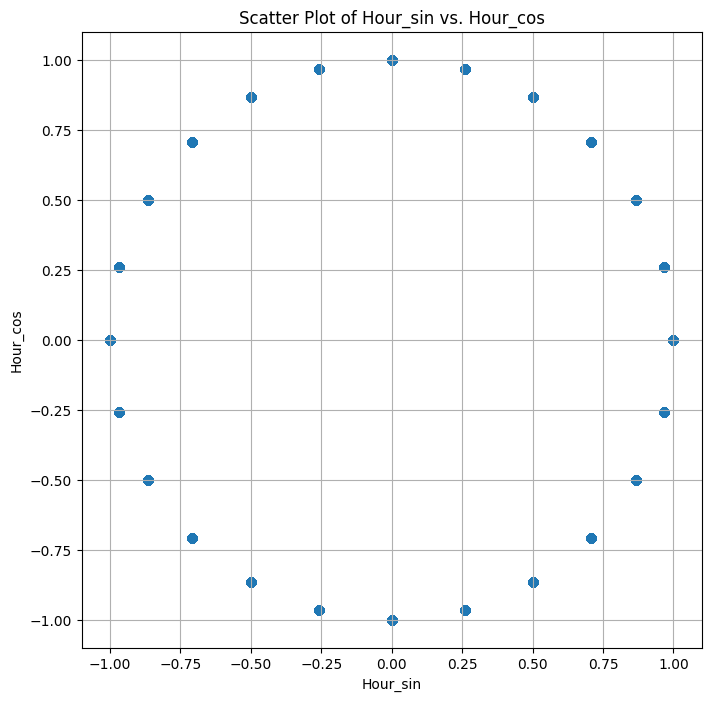

In [88]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Hour_sin'], df['Hour_cos'])
plt.title('Scatter Plot of Hour_sin vs. Hour_cos')
plt.xlabel('Hour_sin')
plt.ylabel('Hour_cos')
plt.grid(True)
plt.show()

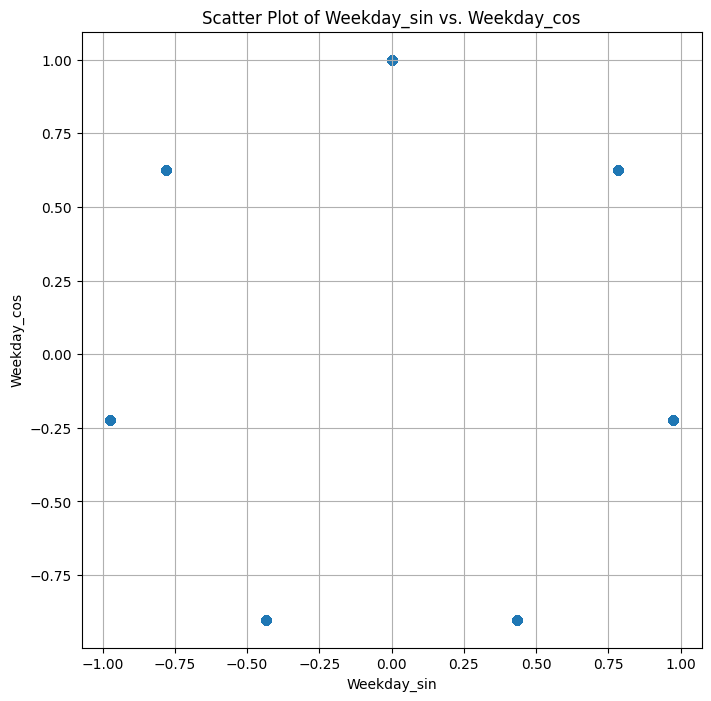

In [89]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Weekday_sin'], df['Weekday_cos'])
plt.title('Scatter Plot of Weekday_sin vs. Weekday_cos')
plt.xlabel('Weekday_sin')
plt.ylabel('Weekday_cos')
plt.grid(True)
plt.show()

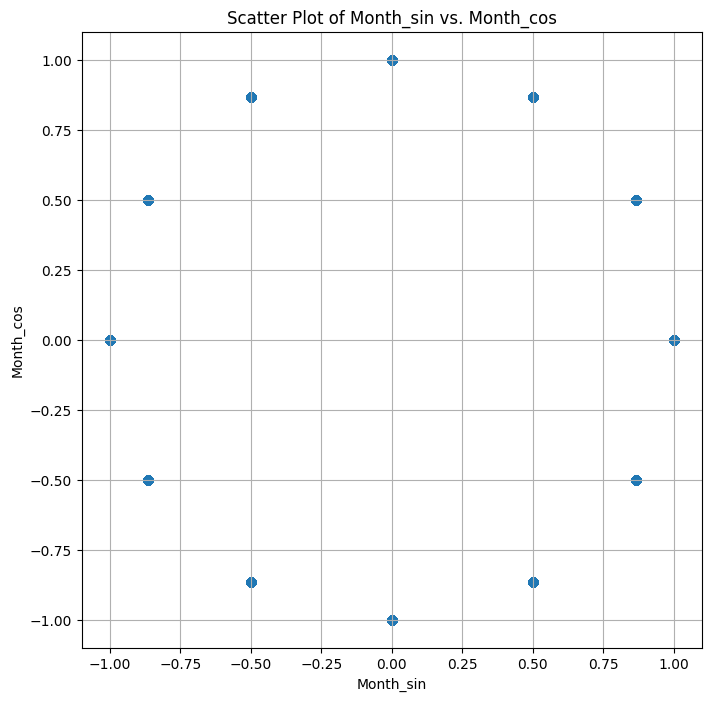

In [90]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Month_sin'], df['Month_cos'])
plt.title('Scatter Plot of Month_sin vs. Month_cos')
plt.xlabel('Month_sin')
plt.ylabel('Month_cos')
plt.grid(True)
plt.show()